# Analyse av GZ-kurve i Python
-----



<p style="text-align:center;">
    ✍️ Lars Erik Nygård  <a href="mailto:lars.e.nygard@ntnu.no">📧</a> 08.02.2024 📅 
</p>


-----

## Læringsutbytte
- Importere og åpne en tekstbasert resultatfil i Python/Jupyter Notebook 
- Inspisere dataene og bruke dataene til å finne arealene under GZ kurven for de ulike IMO kriteriene
- Plotte og visuelt presentere resultatene 
- Lagre plott for bruk i f.eks *Latex* rapport

## Introduksjon
Vi bruker pythonmodulen *pandas* for prosessering av dataene.  


Først må vi importere modulen. 

In [12]:
import pandas as pd



GZ-verdiene er skrevet til en fil av typen .txt som er en forkortelse for [*textfile*](https://en.wikipedia.org/wiki/Text_file). For å lese og skrive til en .txt-fil bruker vi en av pandas metoder *read-csv*. Du kan lese mere om denne [her](https://realpython.com/pandas-read-write-files/#write-a-csv-file).

```{warning}
Her er det viktig at filen med GZ-verdiene ligger i samme mappe som denne Notebooken for at dettte skal fungere. 
```

Vi gir den innleste filen et variabelnavn *gz-data*. Det er forholdsvis enkelt å huske og sier noe om hva vi forventer å finne i variabelen. 

In [13]:

gz_data = pd.read_csv( 'eksempelfil.txt' , sep=r"\s+" , decimal=",", skiprows= 1 ) # sep og decimal er metoder for å sortere og strukturere dataene

Nå vet vi lite om hvordan dataene i filen er strukturert. Vi kan bruke *head()* metoden for å inspisere de 5 første radene. Slike filer kan innholde millioner av linjer og kan derfor bli uoversiktelige.

In [14]:
gz_data.head()

,deg,m
0,0.0,0.000
1,1.0,0.011
2,2.0,0.023
3,3.0,0.034
4,4.0,0.045


Her ser vi første kolonne med øverste linje *deg* som er en forkortelse for degrees. Den inneholder krengevinklene som vi har analysert i Maxsurf Stability. Andre kolonne har GZ-verdien for den tilhørende krengevinkelen. Dataene skal derfor leses rad for rad. Vi kan for eksempel lese ut at ved 2 grader krenging er GZ-verdien 0.023m.

Vi kan gi de to kolonnene hvert sitt variabelnavn *gz_verdi* og *grader*. 

In [66]:
gz_verdi = ['m'] 
grader = ['deg']


Prøv med print kommandoen på hver av variablene, f.eks: 
> print(gz_verdi)

In [87]:
# Skriv din kode her
#

## Visualisere data
For å visualisere (plotte) dataene bruker vi matplotlib modulen i Python. Først må vi importere modulen.

In [63]:
import matplotlib.pyplot as plt

Vi setter her at gradene skal plottes langs x-aksen mens GZ-verdiene skal plottes på y-aksen. 

<AxesSubplot:xlabel='deg'>

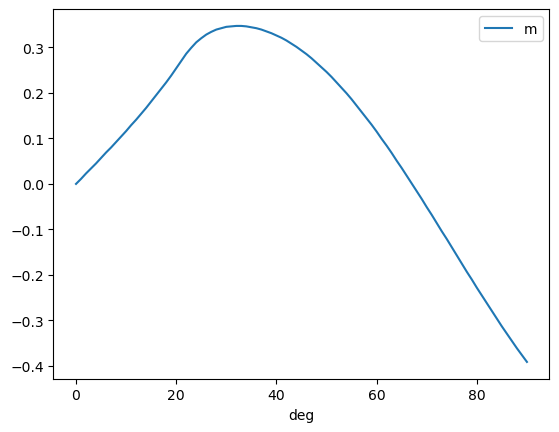

In [62]:
gz_data.plot( x='deg', y='m' )


Plottet viser det vi er ute etter, men vi kan gjøre det litt mere presentabelt med å navngi aksene og ha med enhetene som verdiene skal leses ut av. Et kjapt google søk her vil gi dere mye inspirasjon! 

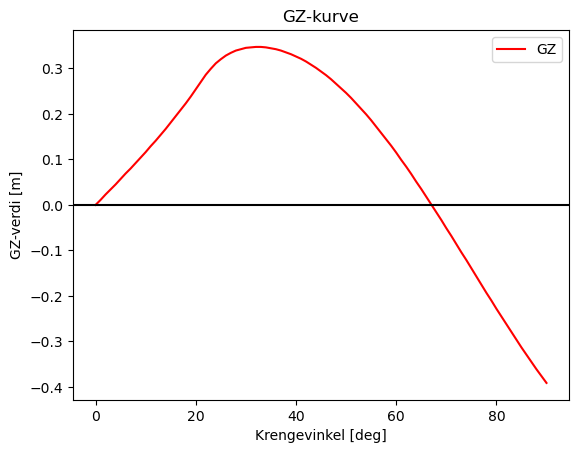

In [64]:
gz_data.plot(x='deg', y='m' , kind='line',  color= 'red', label='GZ') #linjeplot, hva som er y-verdi, farge 
plt.xlabel('Krengevinkel [deg]', loc= 'center') 
plt.ylabel('GZ-verdi [m]')
plt.title('GZ-kurve')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

## Dataanalyse
Nå kan vi gå igang med å analysere dataene opp mot kravene til IMO. Det første kravet er uttrykt som: 

- Areal under GZ-kurven mellom 0-30 grader uttrykt ved $A_{GZ_{0-30}} < 0.055[mrad]$ 

Dette kan for enkle kurver regnes manuelt ved å stykke opp arealet i mindre deler bestående av trekanter og rektangler for så å summere de sammen. 

Arealet under en kurve kan bestemmes nøyaktig ved integrasjon $ \int_{a}^{b} f(x) \,dx$, men det fordrer at man vet $f(x)$ som beskriver kurven. I mangel av dette finnes det et par numeriske metoder som løser dette problemet ved kun å vite noen punkter langs kurven:
- [Trapesmetoden](https://no.wikipedia.org/wiki/Trapesintegrasjon)
- [Simpsonmetoden](https://no.wikipedia.org/wiki/Simpson-integrasjon)

Pandas dataframe gjør det her enkelt for oss: Vi kan finne summen av et interval (her mellom 0 og 30 grader) ved å bruke *.sum()* metoden:

In [67]:
areal_0_30 = gz_data[gz_verdi][0:30].sum()
print(areal_0_30) 


m    5.351
dtype: float64


Siden dataen er presentert i meter og grader vil arealet bli $ meter \times grader$, mens kravet er oppgitt i $ meter \times radianer $. 

Vi har at forholdet mellom grader og radianer er uttrykt ved $360[deg] = 2 \times \pi [rad]$

In [69]:
import math # For å få pi må vi importere math modulen. 

print(areal_0_30 * 2* math.pi /360)



m    0.093393
dtype: float64


### Øving 
Bruk f'string til å presenter resultatet og beregn $\%$-vis margin til kravet. 

In [70]:
# skriv din kode her

## Litt mer avansert visualisering 
Et eksempel under på hvordan man kan skravere arealet man har regnet ut. Modifiser til også å gjelde de andre kriteriene! 

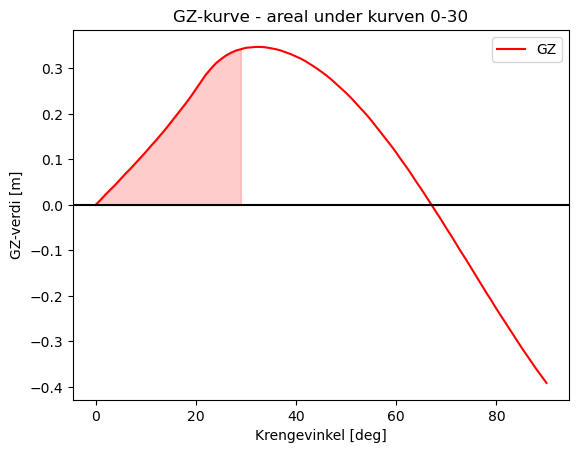

In [86]:
gz_data.plot(x='deg', y='m' , kind='line',  color= 'red', label='GZ') #linjeplot, hva som er y-verdi, farge 
plt.xlabel('Krengevinkel [deg]', loc= 'center') 
plt.ylabel('GZ-verdi [m]')
plt.title('GZ-kurve - areal under kurven 0-30')
plt.axhline(y=0, color='black', linestyle='-')
plt.fill_between( x = gz_data['deg'], y1= gz_data['m'], where = gz_data['deg'].isin(gz_data['deg'][0:30]), color= "r", alpha= 0.2)
plt.savefig('krenging-0-30-grader.png') 
plt.show()



## Lagre visualisering
Et plot kan lagres til en fil med følgende kode.  
> plt.savefig('krenging-0-30-grader.png') <br>

Det er allerede lagt inn i kodecellen over. Sjekk i mappen hvor denne notebooken så skal det nå finnes en fil "krenging-0-30-grader.png"

## Finne max og returnere hvor det oppstår. 

Vi ønsker å vite hvilken vinkel vi har maksimal GZ-verdi, og samtidig når den blir negativ. 

In [81]:
maks_gz = gz_data.loc[gz_data['m'].idxmax()]
print(maks_gz)



deg    32.000
m       0.347
Name: 32, dtype: float64


## Øving 
Bruk eksemplene over til å sjekke de andre kravene: 
- Areal under GZ-kurven mellom 0-40 grader uttrykt ved $A_{GZ_{0-40}} < 0.09[mrad]$
- Areal under GZ-kurven mellom 30-40 grader uttrykt ved $A_{GZ_{30-40}} < 0.03[mrad]$

Og kravene til rettende arm. 